# Support Vector Machines and Decision Trees Project

### The Data
We will be using the dataset <em>tp5.csv</em>. 

This dataset contains 5000 cases and 13 features, including:

- city_name
- magnitude_of_delay
- delay_in_seconds
- affected_roads
- record_date
- luminosity
- avg_temperature
- avg_atm_pressure
- avg_humidity
- avg_wind_speed
- avg_precipitation
- avg_rain
- incidents

## Import Libraries

In [13]:
import pandas as pd
import numpy as np
import joblib


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.utils import resample
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

## Get the data

In [ ]:
data = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')

# Handling missing data and possible data transformations
- Remove missing values, outliers, and unnecessary rows/ columns
- Check and impute null values
- Check Imbalanced data
- Re-indexing and reformatting our data

In [ ]:
data.columns

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain',
       'incidents'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [ ]:
data.head()

city_name magnitude_of_delay  delay_in_seconds  \
0  Guimaraes          UNDEFINED                 0   
1  Guimaraes          UNDEFINED               385   
2  Guimaraes          UNDEFINED                69   
3  Guimaraes              MAJOR              2297   
4  Guimaraes          UNDEFINED                 0   

                                      affected_roads       record_date  \
0                                                  ,  2021-03-15 23:00   
1                                              N101,  2021-12-25 18:00   
2                                                  ,  2021-03-12 15:00   
3  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...  2021-09-29 09:00   
4                          N101,N101,N101,N101,N101,  2021-06-13 11:00   

  luminosity  avg_temperature  avg_atm_pressure  avg_humidity  avg_wind_speed  \
0       DARK             12.0            1013.0          70.0             1.0   
1       DARK             12.0            1007.0          91.0             1.0   
2      LIGHT             14.0            1025.0          64.0             0.0   
3      LIGHT             15.0            1028.0          75.0             1.0   
4      LIGHT             27.0            1020.0          52.0             1.0   

   avg_precipitation   avg_rain  incidents  
0                0.0  Sem Chuva       None  
1                0.0  Sem Chuva       None  
2                0.0  Sem Chuva        Low  
3                0.0  Sem Chuva  Very_High  
4                0.0  Sem Chuva       High

In [ ]:
data.isnull().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

<AxesSubplot:>

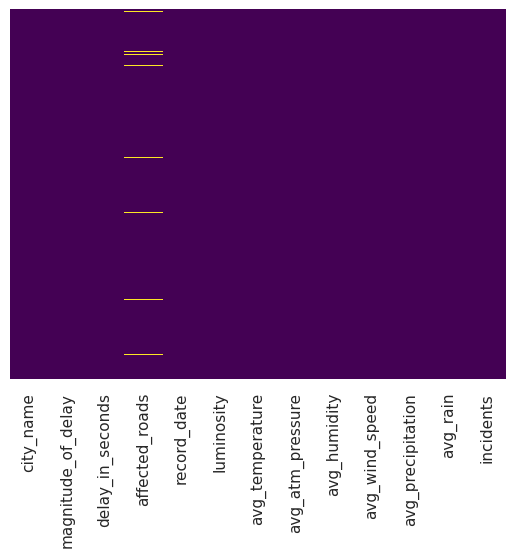

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
data['affected_roads'].head()

0                                                    ,
1                                                N101,
2                                                    ,
3    N101,R206,N105,N101,N101,N101,N101,N101,N101,N...
4                            N101,N101,N101,N101,N101,
Name: affected_roads, dtype: object

In [ ]:
data[data['affected_roads'].isnull()]

city_name magnitude_of_delay  delay_in_seconds affected_roads  \
29    Guimaraes          UNDEFINED                64            NaN   
76    Guimaraes          UNDEFINED               223            NaN   
79    Guimaraes              MAJOR                80            NaN   
91    Guimaraes          UNDEFINED                52            NaN   
109   Guimaraes          UNDEFINED               139            NaN   
...         ...                ...               ...            ...   
4785  Guimaraes              MAJOR               298            NaN   
4811  Guimaraes          UNDEFINED                96            NaN   
4838  Guimaraes          UNDEFINED                36            NaN   
4854  Guimaraes          UNDEFINED               233            NaN   
4910  Guimaraes          UNDEFINED               324            NaN   

           record_date luminosity  avg_temperature  avg_atm_pressure  \
29    2021-01-22 09:00      LIGHT              8.0            1012.0   
76    2021-01-29 08:00      LIGHT             11.0            1022.0   
79    2021-12-24 21:00       DARK             11.0            1004.0   
91    2021-03-02 13:00      LIGHT             13.0            1024.0   
109   2021-12-27 13:00      LIGHT             15.0            1014.0   
...                ...        ...              ...               ...   
4785  2021-12-22 13:00      LIGHT             16.0            1015.0   
4811  2021-03-11 15:00      LIGHT             13.0            1025.0   
4838  2021-03-10 13:00      LIGHT             14.0            1025.0   
4854  2021-01-29 20:00       DARK             11.0            1017.0   
4910  2021-02-03 08:00      LIGHT             10.0            1012.0   

      avg_humidity  avg_wind_speed  avg_precipitation     avg_rain incidents  
29            91.0             4.0                0.0    Sem Chuva    Medium  
76            92.0             1.0                0.0    Sem Chuva      High  
79            92.0             0.0                0.0    Sem Chuva      None  
91            78.0             2.0                0.0    Sem Chuva       Low  
109           88.0             5.0                0.0    Sem Chuva      None  
...            ...             ...                ...          ...       ...  
4785          71.0             3.0                0.0    Sem Chuva      None  
4811          89.0             3.0                0.0  chuva fraca    Medium  
4838          65.0             2.0                0.0    Sem Chuva       Low  
4854          92.0             1.0                0.0    Sem Chuva      High  
4910          90.0             2.0                0.0    Sem Chuva       Low  

[85 rows x 13 columns]

In [ ]:
data.drop(['avg_precipitation'],axis=1,inplace=True)
test.drop(['avg_precipitation'],axis=1,inplace=True)

data.drop(['city_name'],axis=1,inplace=True)
test.drop(['city_name'],axis=1,inplace=True)


data.head()

magnitude_of_delay  delay_in_seconds  \
0          UNDEFINED                 0   
1          UNDEFINED               385   
2          UNDEFINED                69   
3              MAJOR              2297   
4          UNDEFINED                 0   

                                      affected_roads       record_date  \
0                                                  ,  2021-03-15 23:00   
1                                              N101,  2021-12-25 18:00   
2                                                  ,  2021-03-12 15:00   
3  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...  2021-09-29 09:00   
4                          N101,N101,N101,N101,N101,  2021-06-13 11:00   

  luminosity  avg_temperature  avg_atm_pressure  avg_humidity  avg_wind_speed  \
0       DARK             12.0            1013.0          70.0             1.0   
1       DARK             12.0            1007.0          91.0             1.0   
2      LIGHT             14.0            1025.0          64.0             0.0   
3      LIGHT             15.0            1028.0          75.0             1.0   
4      LIGHT             27.0            1020.0          52.0             1.0   

    avg_rain  incidents  
0  Sem Chuva       None  
1  Sem Chuva       None  
2  Sem Chuva        Low  
3  Sem Chuva  Very_High  
4  Sem Chuva       High

<AxesSubplot:>

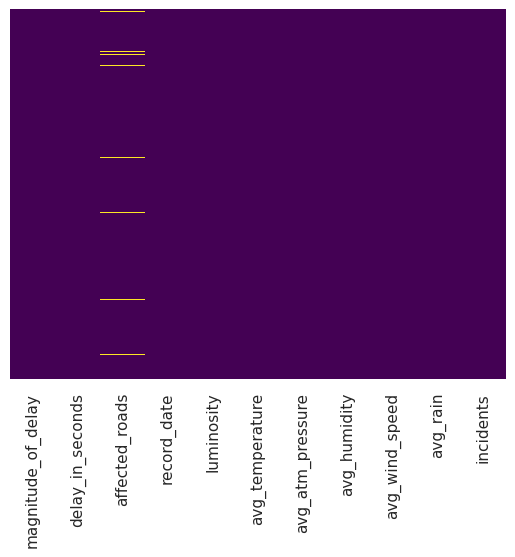

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
data.isnull().sum()

magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_rain               0
incidents              0
dtype: int64

In [ ]:
data.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  5000 non-null   object 
 1   delay_in_seconds    5000 non-null   int64  
 2   affected_roads      4915 non-null   object 
 3   record_date         5000 non-null   object 
 4   luminosity          5000 non-null   object 
 5   avg_temperature     5000 non-null   float64
 6   avg_atm_pressure    5000 non-null   float64
 7   avg_humidity        5000 non-null   float64
 8   avg_wind_speed      5000 non-null   float64
 9   avg_rain            5000 non-null   object 
 10  incidents           5000 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 429.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              -----------

In [11]:
print(data['magnitude_of_delay'].value_counts())

NameError: name 'data' is not defined

In [ ]:
def create_is_major(row):
  if row['magnitude_of_delay'] == 'MAJOR':
    return 1
  return 0

data = data.assign(is_major = data.apply(create_is_major, axis=1))

NameError: name 'data' is not defined

# Magnitude ja é representada pelo delay em segundos

In [ ]:
data.drop('magnitude_of_delay',axis=1, inplace=True)
test.drop('magnitude_of_delay',axis=1, inplace=True)
data.head()

delay_in_seconds                                     affected_roads  \
0                 0                                                  ,   
1               385                                              N101,   
2                69                                                  ,   
3              2297  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...   
4                 0                          N101,N101,N101,N101,N101,   

        record_date luminosity  avg_temperature  avg_atm_pressure  \
0  2021-03-15 23:00       DARK             12.0            1013.0   
1  2021-12-25 18:00       DARK             12.0            1007.0   
2  2021-03-12 15:00      LIGHT             14.0            1025.0   
3  2021-09-29 09:00      LIGHT             15.0            1028.0   
4  2021-06-13 11:00      LIGHT             27.0            1020.0   

   avg_humidity  avg_wind_speed   avg_rain  incidents  
0          70.0             1.0  Sem Chuva       None  
1          91.0             1.0  Sem Chuva       None  
2          64.0             0.0  Sem Chuva        Low  
3          75.0             1.0  Sem Chuva  Very_High  
4          52.0             1.0  Sem Chuva       High

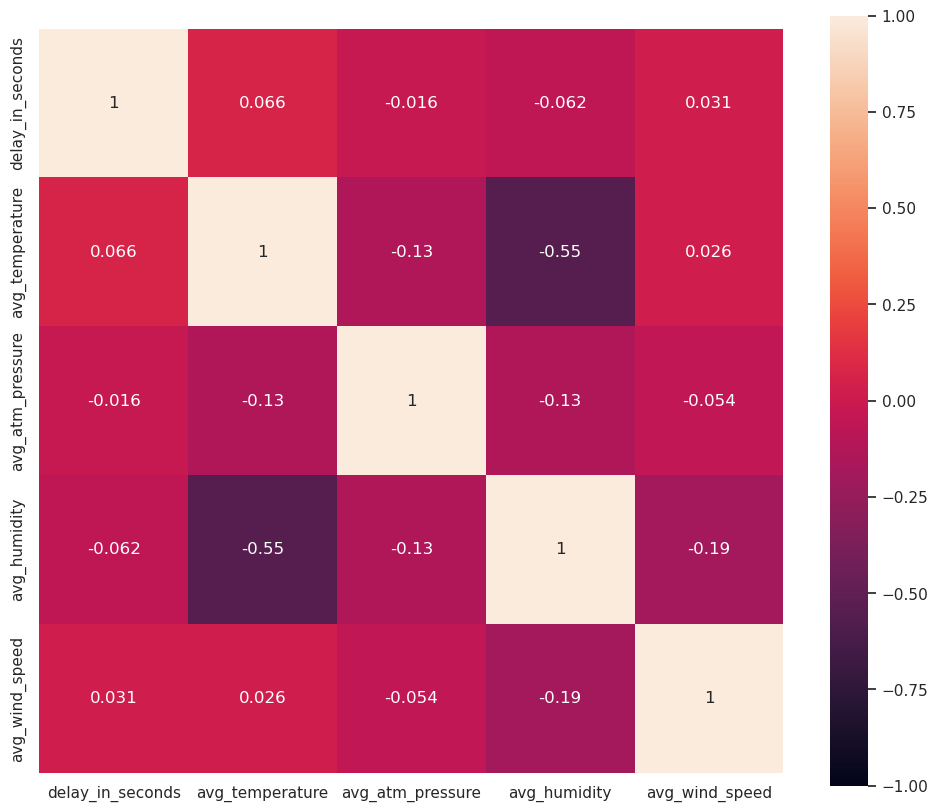

In [ ]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

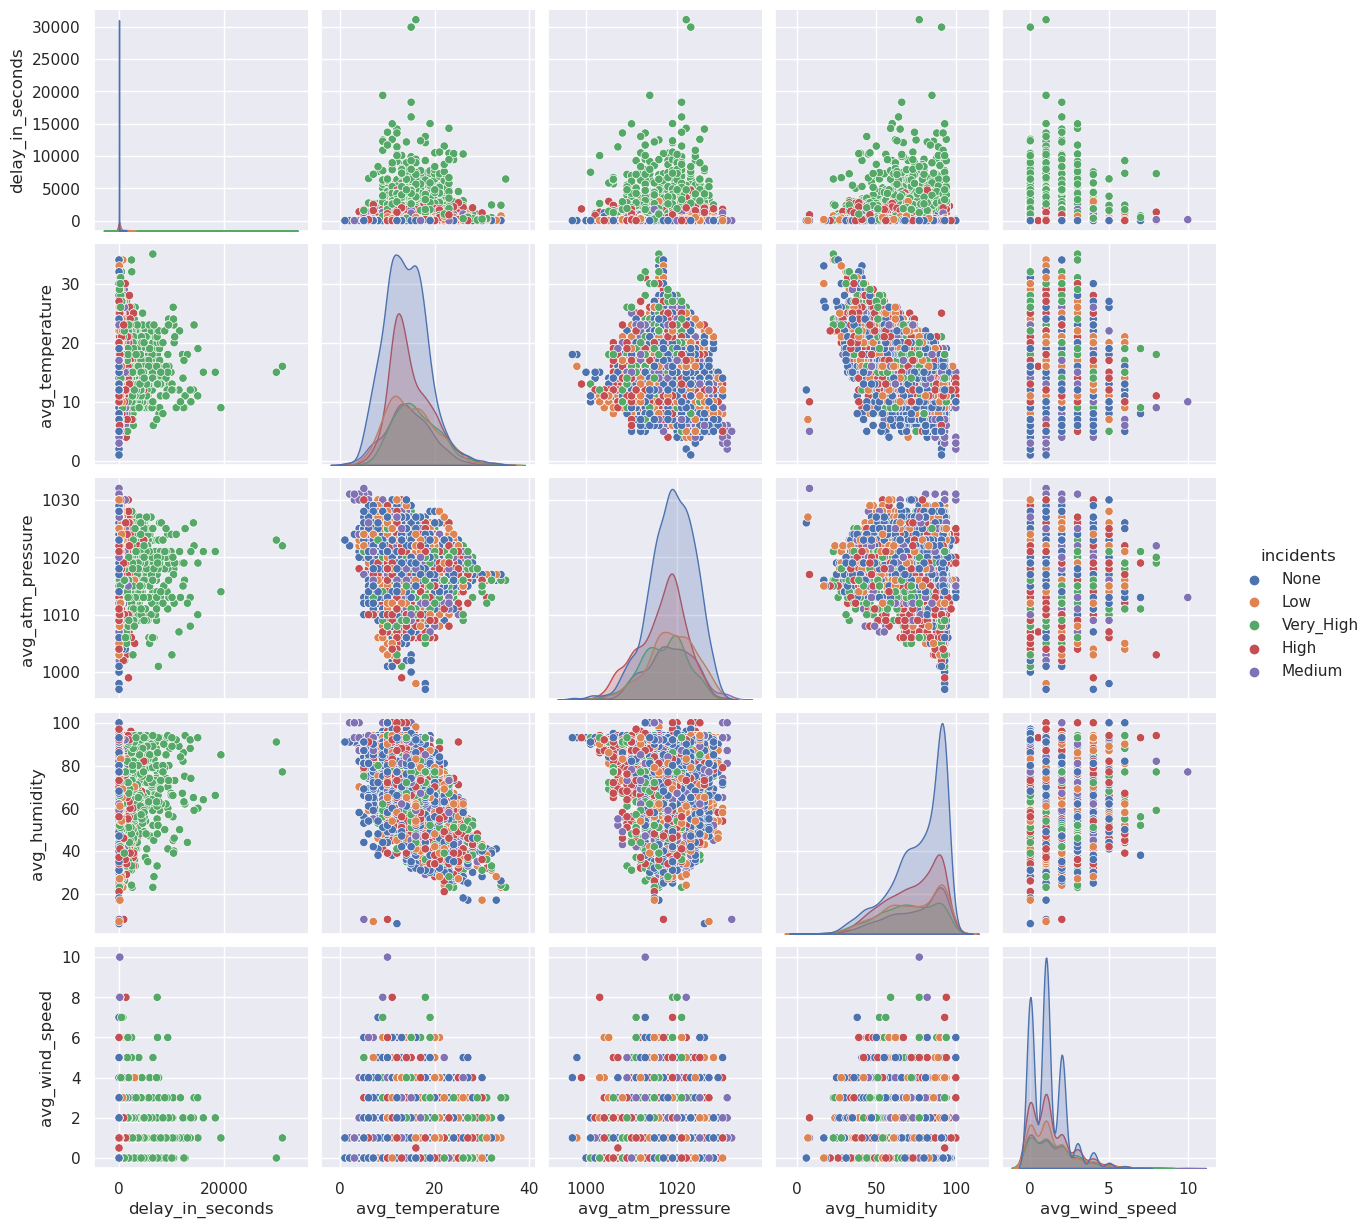

In [ ]:
sns.pairplot(data, hue='incidents') 

In [ ]:
print(data['incidents'].value_counts())

None         2028
High         1073
Low           718
Very_High     603
Medium        578
Name: incidents, dtype: int64


In [ ]:
print(data['incidents'].value_counts().count())

5


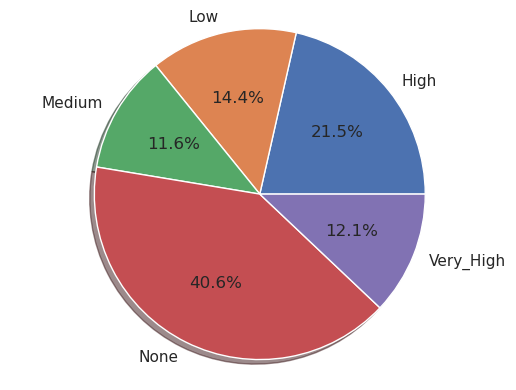

In [ ]:
labels = data['incidents'].astype('category').cat.categories.tolist()
counts = data['incidents'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1,ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()

/home/private/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


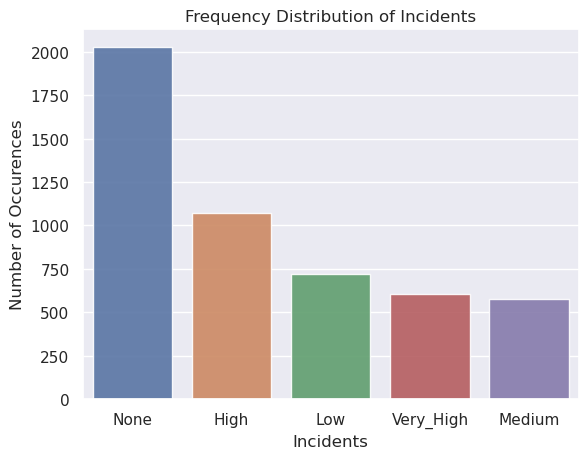

In [ ]:
incidents_count = data['incidents'].value_counts()
sns.set(style="darkgrid")
sns.barplot(incidents_count.index, incidents_count.values, alpha=0.9)
plt.title('Frequency Distribution of Incidents')
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Incidents',fontsize=12)
plt.show()

In [ ]:
data_r1=data.copy()
data_r1.head()

delay_in_seconds                                     affected_roads  \
0                 0                                                  ,   
1               385                                              N101,   
2                69                                                  ,   
3              2297  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...   
4                 0                          N101,N101,N101,N101,N101,   

        record_date luminosity  avg_temperature  avg_atm_pressure  \
0  2021-03-15 23:00       DARK             12.0            1013.0   
1  2021-12-25 18:00       DARK             12.0            1007.0   
2  2021-03-12 15:00      LIGHT             14.0            1025.0   
3  2021-09-29 09:00      LIGHT             15.0            1028.0   
4  2021-06-13 11:00      LIGHT             27.0            1020.0   

   avg_humidity  avg_wind_speed   avg_rain  incidents  
0          70.0             1.0  Sem Chuva       None  
1          91.0             1.0  Sem Chuva       None  
2          64.0             0.0  Sem Chuva        Low  
3          75.0             1.0  Sem Chuva  Very_High  
4          52.0             1.0  Sem Chuva       High

In [ ]:
replace_map = {'incidents' : {'None':0,'Low':1,'Medium':2,'High':3, 'Very_High':4}}

In [ ]:
#data_r1.replace(replace_map,inplace=True)
data_r1.head()


delay_in_seconds                                     affected_roads  \
0                 0                                                  ,   
1               385                                              N101,   
2                69                                                  ,   
3              2297  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...   
4                 0                          N101,N101,N101,N101,N101,   

        record_date luminosity  avg_temperature  avg_atm_pressure  \
0  2021-03-15 23:00       DARK             12.0            1013.0   
1  2021-12-25 18:00       DARK             12.0            1007.0   
2  2021-03-12 15:00      LIGHT             14.0            1025.0   
3  2021-09-29 09:00      LIGHT             15.0            1028.0   
4  2021-06-13 11:00      LIGHT             27.0            1020.0   

   avg_humidity  avg_wind_speed   avg_rain  incidents  
0          70.0             1.0  Sem Chuva       None  
1          91.0             1.0  Sem Chuva       None  
2          64.0             0.0  Sem Chuva        Low  
3          75.0             1.0  Sem Chuva  Very_High  
4          52.0             1.0  Sem Chuva       High

In [ ]:
data.replace(replace_map,inplace=True)
test.replace(replace_map,inplace=True)
data.head()

delay_in_seconds                                     affected_roads  \
0                 0                                                  ,   
1               385                                              N101,   
2                69                                                  ,   
3              2297  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...   
4                 0                          N101,N101,N101,N101,N101,   

        record_date luminosity  avg_temperature  avg_atm_pressure  \
0  2021-03-15 23:00       DARK             12.0            1013.0   
1  2021-12-25 18:00       DARK             12.0            1007.0   
2  2021-03-12 15:00      LIGHT             14.0            1025.0   
3  2021-09-29 09:00      LIGHT             15.0            1028.0   
4  2021-06-13 11:00      LIGHT             27.0            1020.0   

   avg_humidity  avg_wind_speed   avg_rain  incidents  
0          70.0             1.0  Sem Chuva          0  
1          91.0             1.0  Sem Chuva          0  
2          64.0             0.0  Sem Chuva          1  
3          75.0             1.0  Sem Chuva          4  
4          52.0             1.0  Sem Chuva          3

In [ ]:
#values of avg_speed
data['avg_rain'].value_counts()

Sem Chuva         4756
chuva fraca        214
chuva moderada      27
chuva forte          3
Name: avg_rain, dtype: int64

In [ ]:
#remove avg rain column
data.drop('avg_rain',axis=1,inplace=True)
test.drop('avg_rain',axis=1,inplace=True)

### Balanceamento de Dados

In [ ]:
data.incidents.value_counts()

0    2028
3    1073
1     718
4     603
2     578
Name: incidents, dtype: int64

In [ ]:
#balance the incidents column


data_majority = data[data.incidents==0]
data_minority1 = data[data.incidents==1]
data_minority2 = data[data.incidents==2]
data_minority3 = data[data.incidents==3]
data_minority4 = data[data.incidents==4]

data_minority1_upsampled = resample(data_minority1,
replace=True,
n_samples=2028,
random_state=53)

data_minority2_upsampled = resample(data_minority2,
replace=True,
n_samples=2028,
random_state=53)

data_minority3_upsampled = resample(data_minority3,
replace=True,
n_samples=2028,
random_state=53)

data_minority4_upsampled = resample(data_minority4,
replace=True,
n_samples=2028,
random_state=53)

data_upsampled = pd.concat([data_majority, data_minority1_upsampled, data_minority2_upsampled, data_minority3_upsampled, data_minority4_upsampled])

data_upsampled.incidents.value_counts()

data_upsampled.info()

    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10140 entries, 0 to 2518
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   delay_in_seconds  10140 non-null  int64  
 1   affected_roads    9914 non-null   object 
 2   record_date       10140 non-null  object 
 3   luminosity        10140 non-null  object 
 4   avg_temperature   10140 non-null  float64
 5   avg_atm_pressure  10140 non-null  float64
 6   avg_humidity      10140 non-null  float64
 7   avg_wind_speed    10140 non-null  float64
 8   incidents         10140 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 792.2+ KB


In [ ]:
data['luminosity'].value_counts()

DARK         2489
LIGHT        2325
LOW_LIGHT     186
Name: luminosity, dtype: int64

In [ ]:
replace_lum = {'luminosity' : {'DARK':0,'LOW_LIGHT':1,'LIGHT':2}}
data.replace(replace_lum,inplace=True)
test.replace(replace_lum,inplace=True)
data.head()

delay_in_seconds                                     affected_roads  \
0                 0                                                  ,   
1               385                                              N101,   
2                69                                                  ,   
3              2297  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...   
4                 0                          N101,N101,N101,N101,N101,   

        record_date  luminosity  avg_temperature  avg_atm_pressure  \
0  2021-03-15 23:00           0             12.0            1013.0   
1  2021-12-25 18:00           0             12.0            1007.0   
2  2021-03-12 15:00           2             14.0            1025.0   
3  2021-09-29 09:00           2             15.0            1028.0   
4  2021-06-13 11:00           2             27.0            1020.0   

   avg_humidity  avg_wind_speed  incidents  
0          70.0             1.0          0  
1          91.0             1.0          0  
2          64.0             0.0          1  
3          75.0             1.0          4  
4          52.0             1.0          3

# Agora com mais dados para matriz de correlacao e pairplot

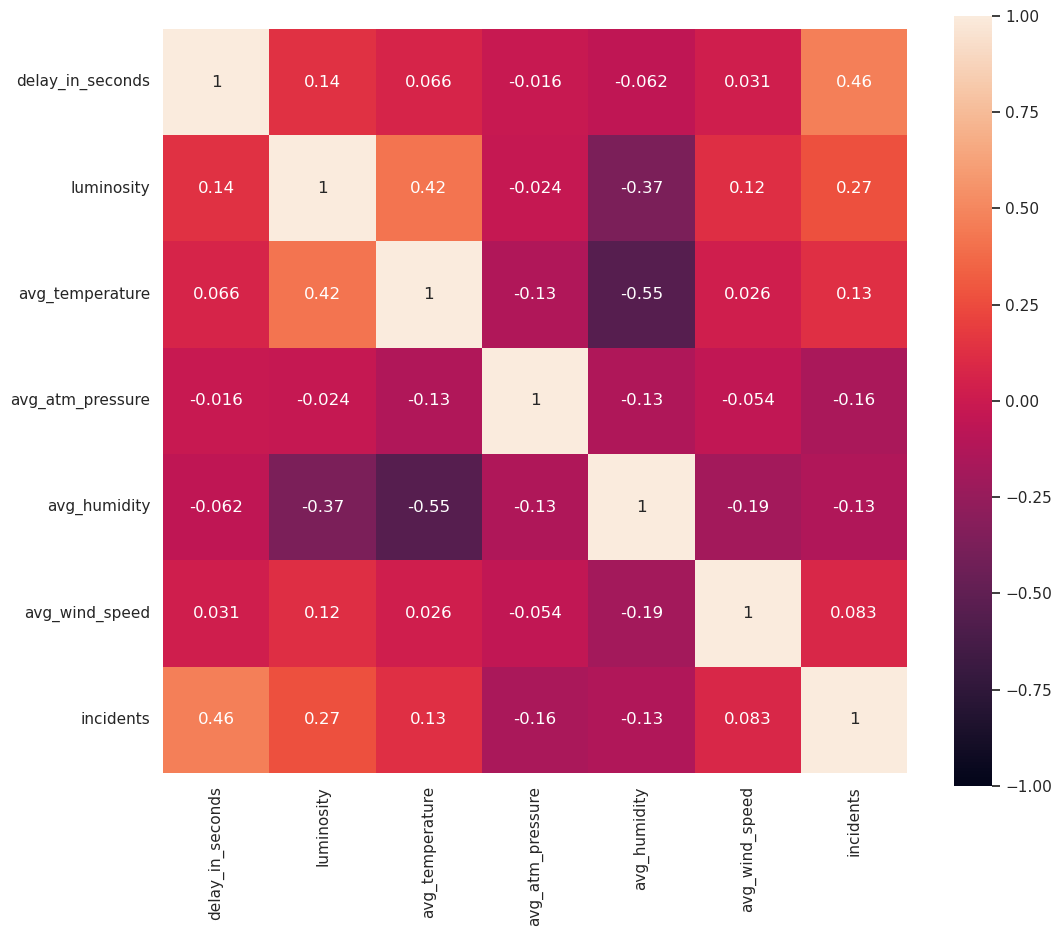

In [ ]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

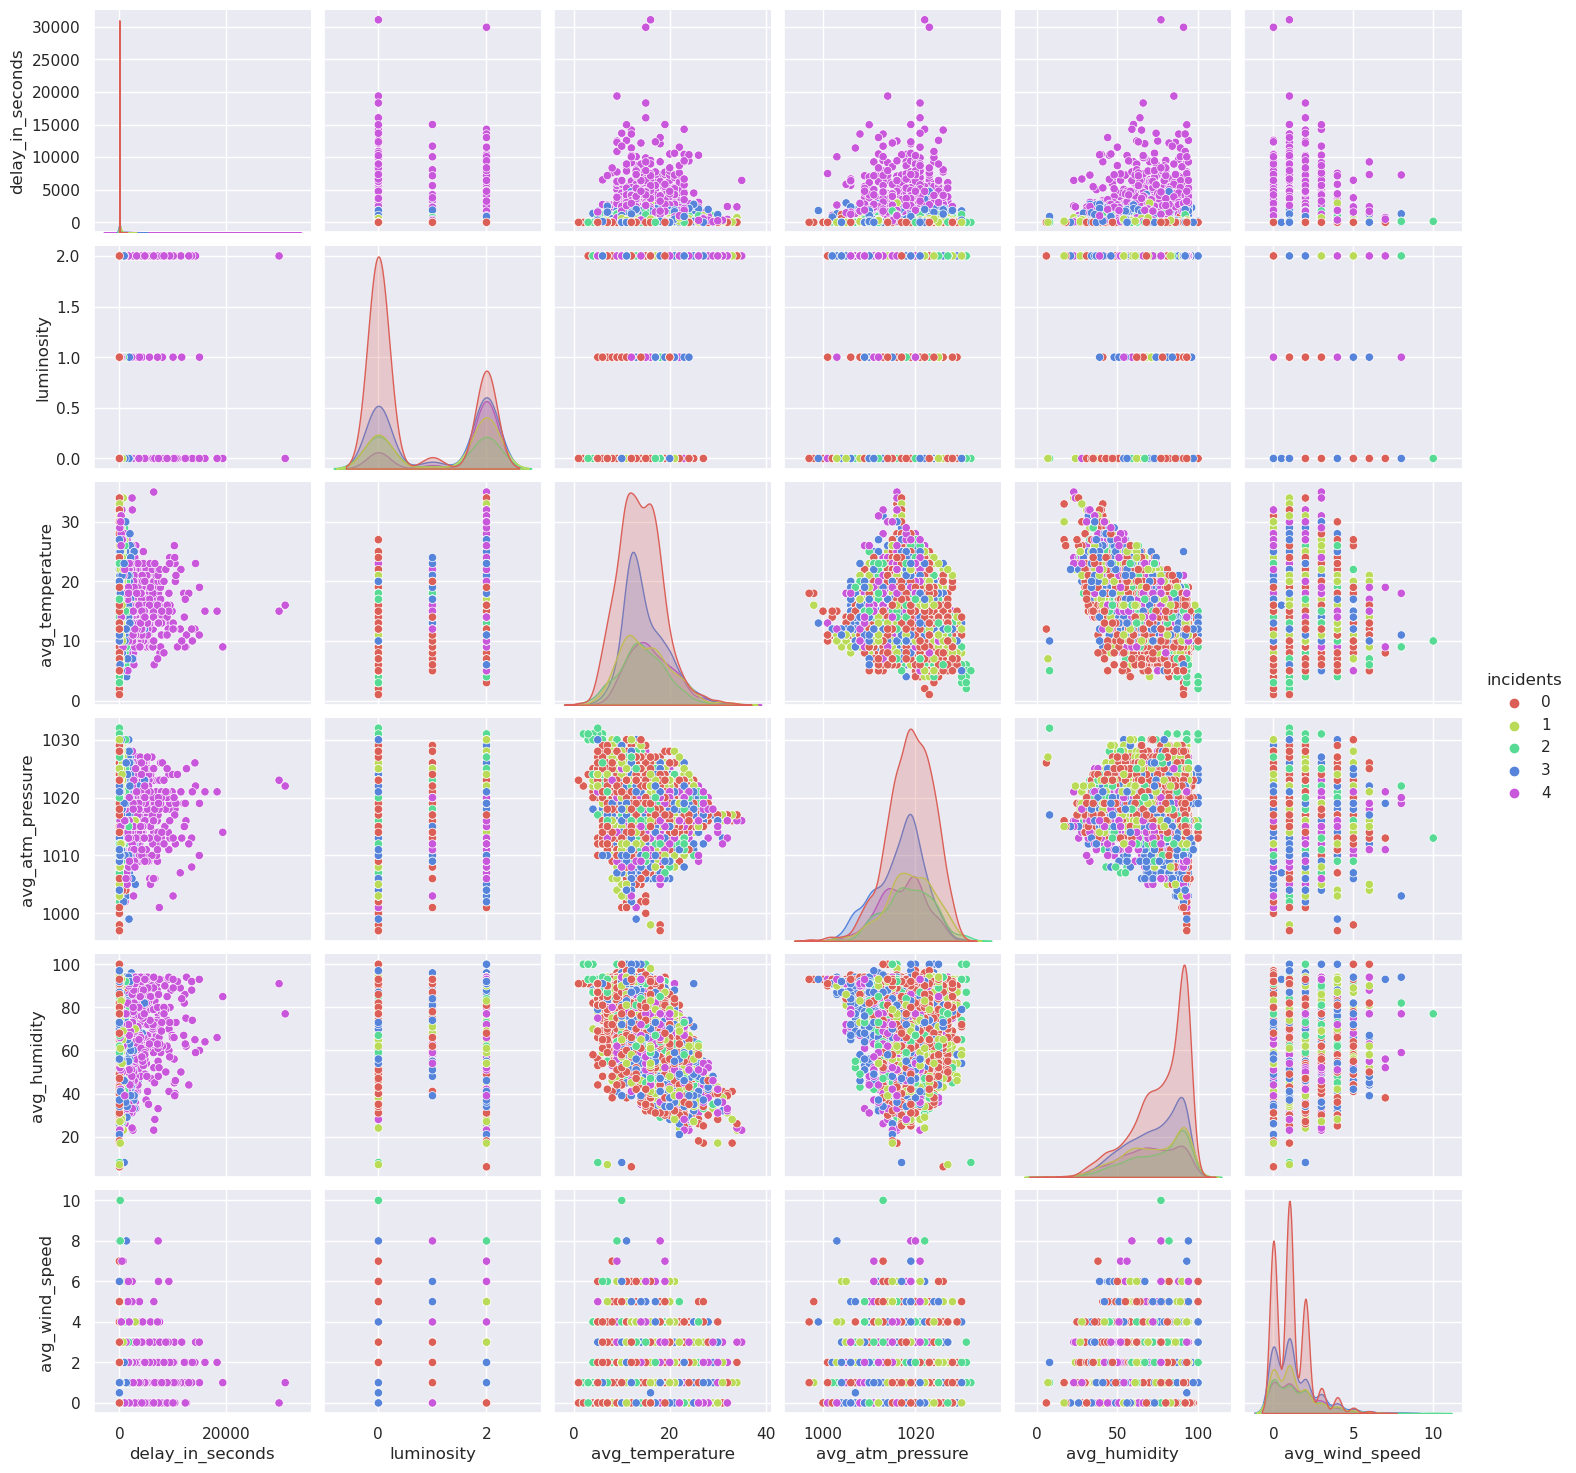

In [ ]:
sns.pairplot(data, hue='incidents',palette=sns.color_palette("hls", 5)) 

In [ ]:
data.head()

delay_in_seconds                                     affected_roads  \
0                 0                                                  ,   
1               385                                              N101,   
2                69                                                  ,   
3              2297  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...   
4                 0                          N101,N101,N101,N101,N101,   

        record_date  luminosity  avg_temperature  avg_atm_pressure  \
0  2021-03-15 23:00           0             12.0            1013.0   
1  2021-12-25 18:00           0             12.0            1007.0   
2  2021-03-12 15:00           2             14.0            1025.0   
3  2021-09-29 09:00           2             15.0            1028.0   
4  2021-06-13 11:00           2             27.0            1020.0   

   avg_humidity  avg_wind_speed  incidents  
0          70.0             1.0          0  
1          91.0             1.0          0  
2          64.0             0.0          1  
3          75.0             1.0          4  
4          52.0             1.0          3

# Tratar as affected_roads com nº de vezes, moda e valores diferentes 

In [ ]:
data_r1 = data.copy()

In [ ]:
data_r1["affected_roads"].describe()

count                         4915
unique                         678
top       N101,N101,N101,N101,N101
freq                          1514
Name: affected_roads, dtype: object

# Tentar substituir os NaN pelo valor mais usual (N101,N101,N101,N101,N101)

In [ ]:
import math
def affected_road(lista):
    n_relatos = 0
    n_relatos_dif = 0
    maior_relatos_iguais = 0
    dic = {}
    if isinstance(lista, float):
        return pd.Series({"N_relatos": 5, "N_relatos_dif": 1, "Mais relatos na mesma rua":5})
    else:
        l = lista.split(",")
        for rua in l:
            if len(rua) != 0:            
                if rua in dic.keys():
                    dic[rua] += 1
                else:
                    dic[rua] = 1
                    n_relatos_dif += 1
                n_relatos += 1
        
        for rua in dic.keys():
            if dic[rua] > maior_relatos_iguais:
                maior_relatos_iguais = dic[rua]
    
    return pd.Series({"N_relatos": n_relatos, "N_relatos_dif": n_relatos_dif, "Mais relatos na mesma rua":maior_relatos_iguais})

    

data_r1[["N_relatos","N_relatos_dif","Mais relatos na mesma rua"]] = data_r1['affected_roads'].apply(affected_road)
data_r1.drop('affected_roads',axis=1, inplace=True)
data_r1.head()

delay_in_seconds       record_date  luminosity  avg_temperature  \
0                 0  2021-03-15 23:00           0             12.0   
1               385  2021-12-25 18:00           0             12.0   
2                69  2021-03-12 15:00           2             14.0   
3              2297  2021-09-29 09:00           2             15.0   
4                 0  2021-06-13 11:00           2             27.0   

   avg_atm_pressure  avg_humidity  avg_wind_speed  incidents  N_relatos  \
0            1013.0          70.0             1.0          0          0   
1            1007.0          91.0             1.0          0          1   
2            1025.0          64.0             0.0          1          0   
3            1028.0          75.0             1.0          4         11   
4            1020.0          52.0             1.0          3          5   

   N_relatos_dif  Mais relatos na mesma rua  
0              0                          0  
1              1                          1  
2              0                          0  
3              3                          9  
4              1                          5

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   delay_in_seconds  5000 non-null   int64  
 1   affected_roads    4915 non-null   object 
 2   record_date       5000 non-null   object 
 3   luminosity        5000 non-null   int64  
 4   avg_temperature   5000 non-null   float64
 5   avg_atm_pressure  5000 non-null   float64
 6   avg_humidity      5000 non-null   float64
 7   avg_wind_speed    5000 non-null   float64
 8   incidents         5000 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 351.7+ KB


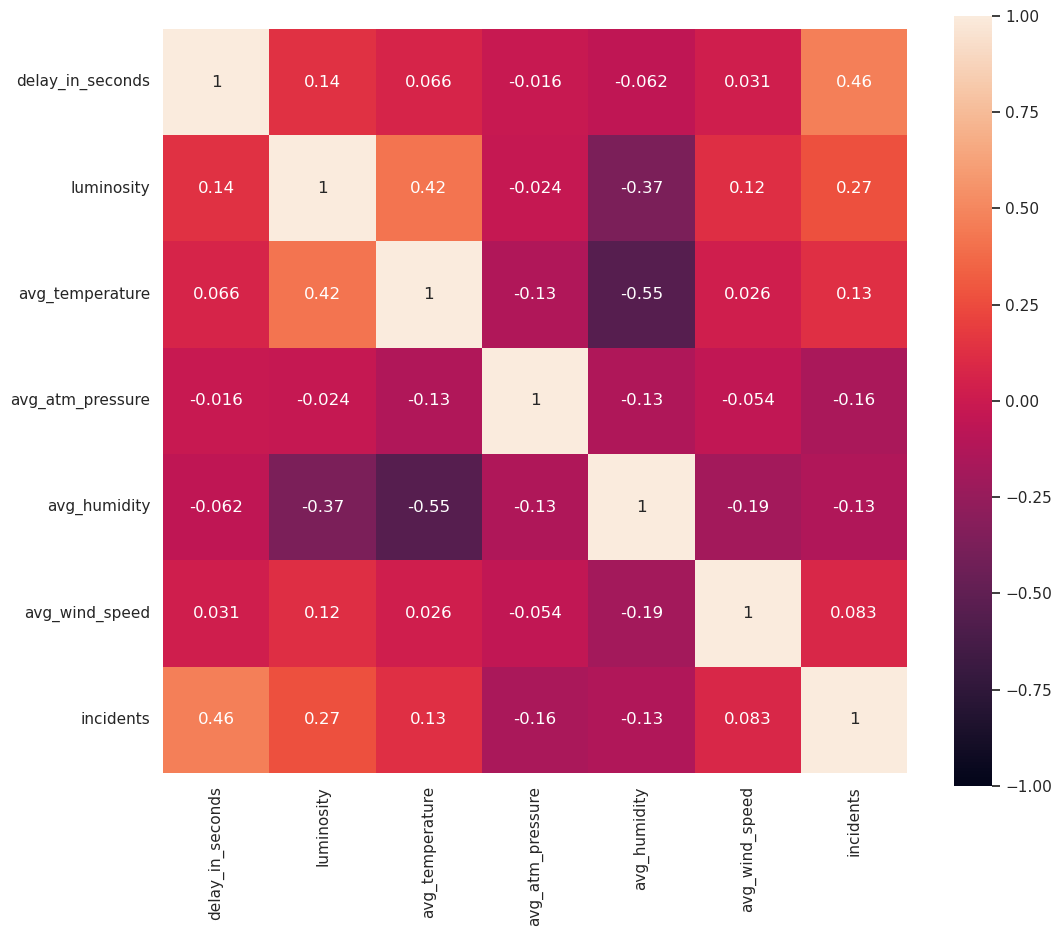

In [ ]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

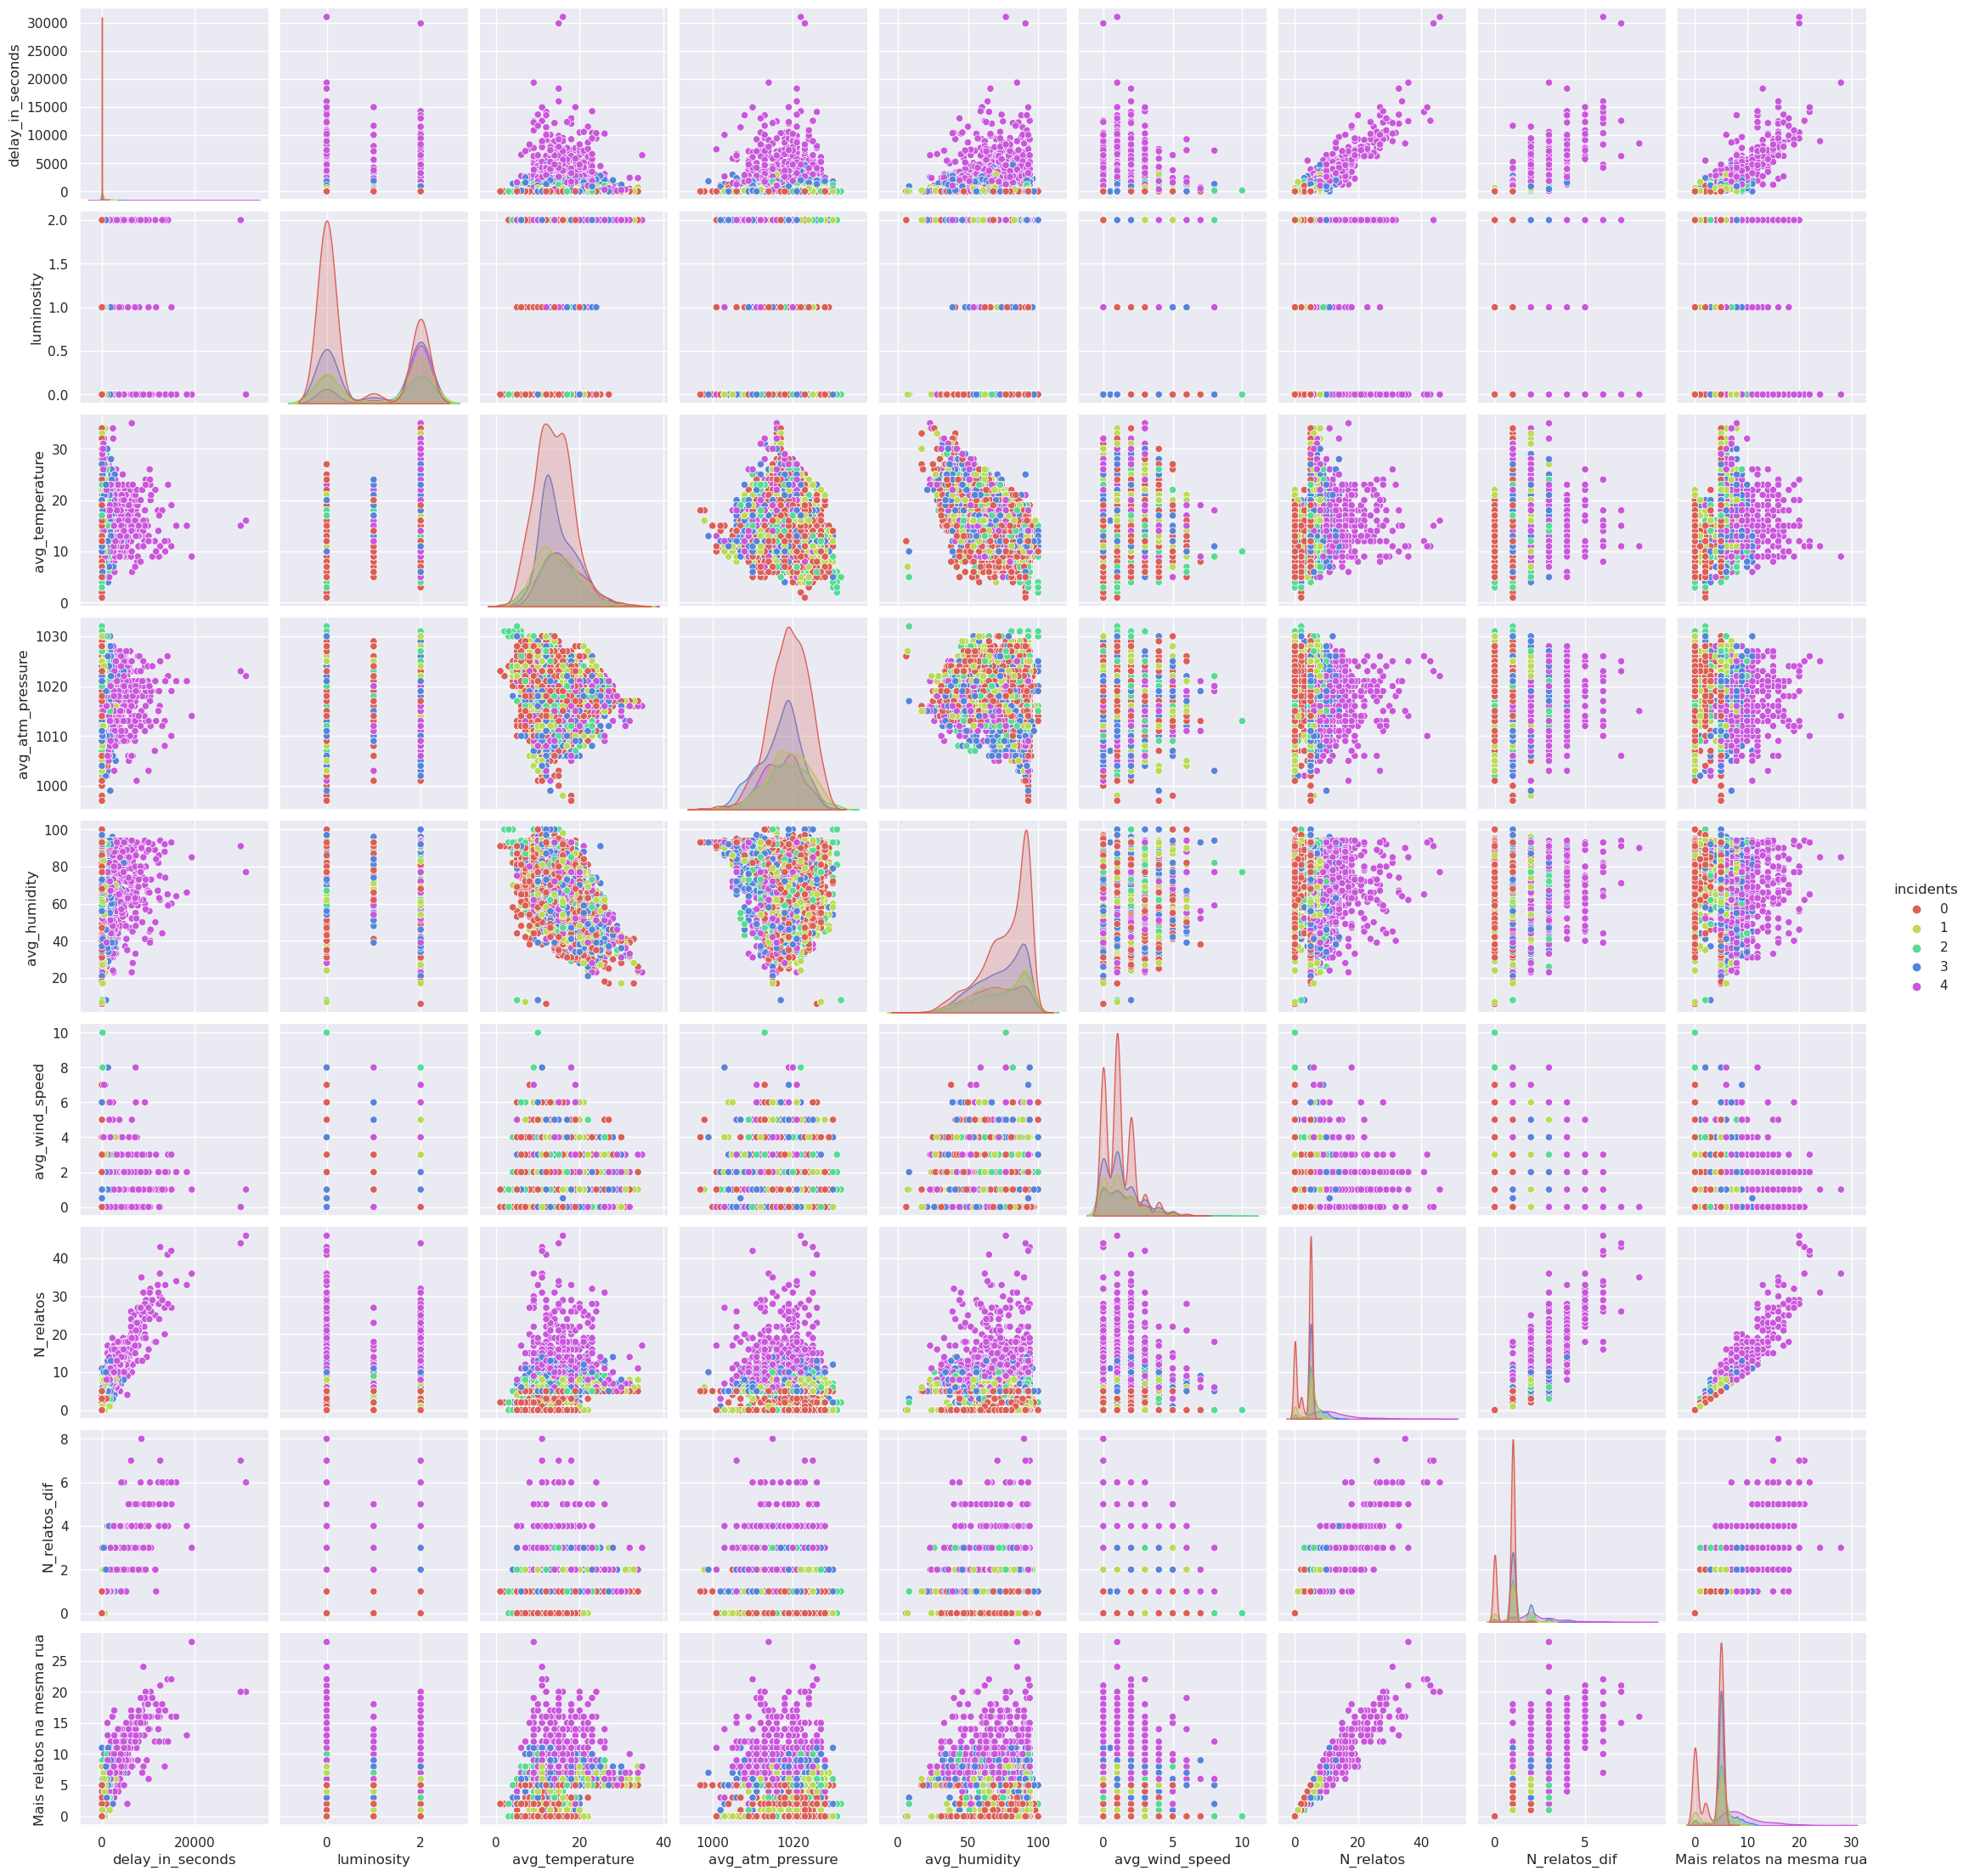

In [ ]:
sns.pairplot(data_r1, hue='incidents',palette=sns.color_palette("hls", 5)) 

In [ ]:
data.head()

delay_in_seconds                                     affected_roads  \
0                 0                                                  ,   
1               385                                              N101,   
2                69                                                  ,   
3              2297  N101,R206,N105,N101,N101,N101,N101,N101,N101,N...   
4                 0                          N101,N101,N101,N101,N101,   

        record_date  luminosity  avg_temperature  avg_atm_pressure  \
0  2021-03-15 23:00           0             12.0            1013.0   
1  2021-12-25 18:00           0             12.0            1007.0   
2  2021-03-12 15:00           2             14.0            1025.0   
3  2021-09-29 09:00           2             15.0            1028.0   
4  2021-06-13 11:00           2             27.0            1020.0   

   avg_humidity  avg_wind_speed  incidents  
0          70.0             1.0          0  
1          91.0             1.0          0  
2          64.0             0.0          1  
3          75.0             1.0          4  
4          52.0             1.0          3

In [ ]:
data[["N_relatos","N_relatos_dif","Mais relatos na mesma rua"]] = data['affected_roads'].apply(affected_road)
data.drop('affected_roads',axis=1, inplace=True)

test[["N_relatos","N_relatos_dif","Mais relatos na mesma rua"]] = test['affected_roads'].apply(affected_road)
test.drop('affected_roads',axis=1, inplace=True)
data.head()

delay_in_seconds       record_date  luminosity  avg_temperature  \
0                 0  2021-03-15 23:00           0             12.0   
1               385  2021-12-25 18:00           0             12.0   
2                69  2021-03-12 15:00           2             14.0   
3              2297  2021-09-29 09:00           2             15.0   
4                 0  2021-06-13 11:00           2             27.0   

   avg_atm_pressure  avg_humidity  avg_wind_speed  incidents  N_relatos  \
0            1013.0          70.0             1.0          0          0   
1            1007.0          91.0             1.0          0          1   
2            1025.0          64.0             0.0          1          0   
3            1028.0          75.0             1.0          4         11   
4            1020.0          52.0             1.0          3          5   

   N_relatos_dif  Mais relatos na mesma rua  
0              0                          0  
1              1                          1  
2              0                          0  
3              3                          9  
4              1                          5

In [ ]:
data_dt = data.copy()

In [ ]:
data_dt['record_date'].head()

0    2021-03-15 23:00
1    2021-12-25 18:00
2    2021-03-12 15:00
3    2021-09-29 09:00
4    2021-06-13 11:00
Name: record_date, dtype: object

In [ ]:
data['record_date'] = pd.to_datetime(data['record_date'], format = '%Y-%m-%d %H:%M', errors='coerce')
data['record_date_month'] = data['record_date'].dt.month
data['record date day'] = data['record_date'].dt.day
data['record_date_hour'] = data['record_date'].dt.hour
data['day_of_week'] = data['record_date'].dt.dayofweek



data.drop('record_date',axis=1,inplace=True)


test['record_date'] = pd.to_datetime(test['record_date'], format = '%Y-%m-%d %H:%M', errors='coerce')
test['record_date_month'] = test['record_date'].dt.month
test['record date day'] = test['record_date'].dt.day
test['record_date_hour'] = test['record_date'].dt.hour
test['day_of_week'] = test['record_date'].dt.dayofweek

test.drop('record_date',axis=1,inplace=True)

In [ ]:
data.head()

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0                 0           0             12.0            1013.0   
1               385           0             12.0            1007.0   
2                69           2             14.0            1025.0   
3              2297           2             15.0            1028.0   
4                 0           2             27.0            1020.0   

   avg_humidity  avg_wind_speed  incidents  N_relatos  N_relatos_dif  \
0          70.0             1.0          0          0              0   
1          91.0             1.0          0          1              1   
2          64.0             0.0          1          0              0   
3          75.0             1.0          4         11              3   
4          52.0             1.0          3          5              1   

   Mais relatos na mesma rua  record_date_month  record date day  \
0                          0                  3               15   
1                          1                 12               25   
2                          0                  3               12   
3                          9                  9               29   
4                          5                  6               13   

   record_date_hour  day_of_week  
0                23            0  
1                18            5  
2                15            4  
3                 9            2  
4                11            6

In [ ]:
test.head()

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0              1211           2             15.0            1018.0   
1                 0           0             16.0            1018.0   
2                 0           2             22.0            1017.0   
3               140           2             18.0            1008.0   
4                 0           2             20.0            1022.0   

   avg_humidity  avg_wind_speed  N_relatos  N_relatos_dif  \
0          80.0             0.0          6              1   
1          41.0             2.0          5              1   
2          71.0             0.0          5              1   
3          81.0             3.0          6              2   
4          86.0             0.0          5              1   

   Mais relatos na mesma rua  record_date_month  record date day  \
0                          6                  4               13   
1                          5                 10               13   
2                          5                  7               18   
3                          5                 10               30   
4                          5                 10               18   

   record_date_hour  day_of_week  
0                19            1  
1                 4            2  
2                19            6  
3                15            5  
4                10            0

/home/private/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
3                 2297           2             15.0            1028.0   
8                 1368           2             14.0            1017.0   
9                10431           2             23.0            1018.0   
18                1364           2             19.0            1020.0   
19                2186           2             15.0            1020.0   
...                ...         ...              ...               ...   
4958              1723           2             18.0            1013.0   
4965              3249           2             18.0            1021.0   
4973              4777           2             14.0            1009.0   
4989              1009           2             22.0            1016.0   
4991              8360           2             20.0            1012.0   

      avg_humidity  avg_wind_speed  incidents  N_relatos  N_relatos_dif  \
3             75.0             1.0          4         11              3   
8             67.0             5.0          4          9              1   
9             40.0             0.0          4         32              5   
18            60.0             0.0          3          8              1   
19            64.0             1.0          3          8              1   
...            ...             ...        ...        ...            ...   
4958          72.0             2.0          4          8              2   
4965          93.0             3.0          4         13              2   
4973          93.0             2.0          4         10              2   
4989          39.0             0.0          4          8              1   
4991          77.0             2.0          4         27              4   

      Mais relatos na mesma rua  record_date_month  record date day  \
3                             9                  9               29   
8                             9                  5                1   
9                            19                 10               11   
18                            8                 11               13   
19                            8                 11               20   
...                         ...                ...              ...   
4958                          7                  4               22   
4965                         11                 10               20   
4973                          5                 10               29   
4989                          8                  4                5   
4991                         19                  9               24   

      record_date_hour  day_of_week  
3                    9            2  
8                   12            5  
9                   18            0  
18                  12            5  
19                  11            5  
...                ...          ...  
4958                17            3  
4965                13            2  
4973                12            4  
4989                17            0  
4991                18            4  

[706 rows x 14 columns]

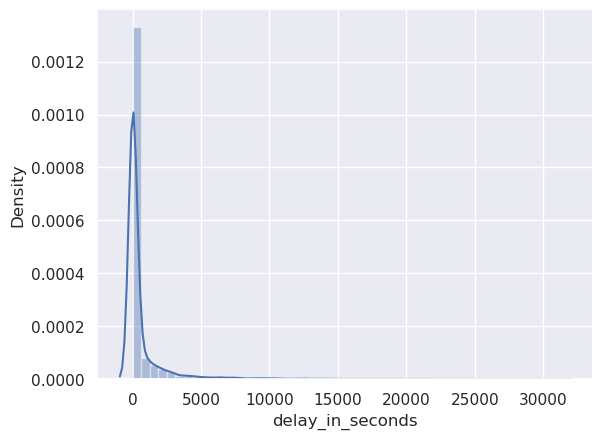

In [ ]:
sns.distplot(data["delay_in_seconds"])
data[data["delay_in_seconds"] > 1000]

<AxesSubplot:xlabel='delay_in_seconds', ylabel='N_relatos'>

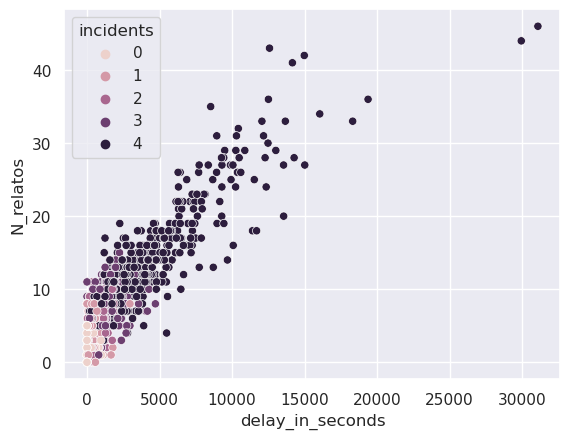

In [ ]:
sns.scatterplot(data=data,y="N_relatos",x="delay_in_seconds",hue="incidents")

/home/private/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='record_date_hour', ylabel='Density'>

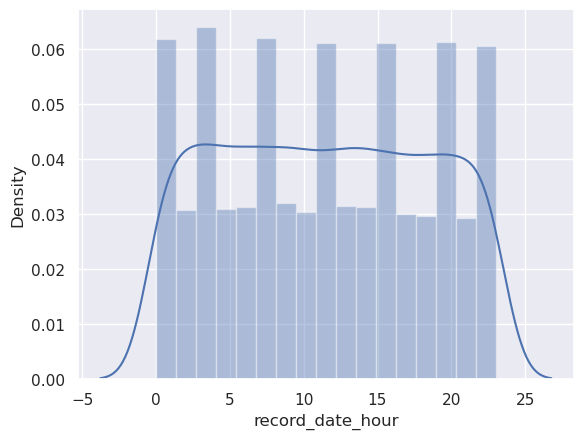

In [ ]:
sns.distplot(data["record_date_hour"])


<AxesSubplot:xlabel='record_date_hour', ylabel='N_relatos'>

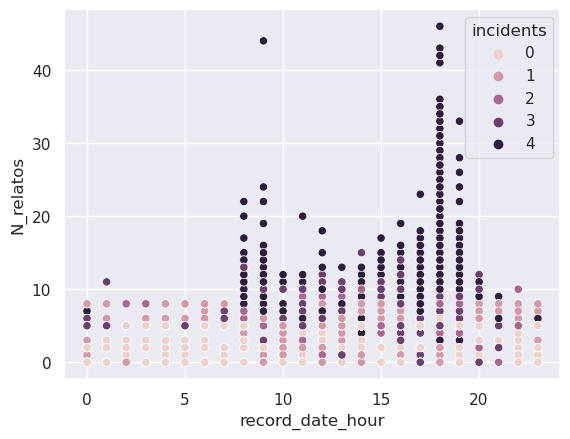

In [ ]:
sns.scatterplot(data=data,y="N_relatos",x="record_date_hour",hue="incidents")

In [ ]:
#make a new column 
data['is_transit'] = data['record_date_hour'].apply(lambda x: 1 if (x > 5 and x < 10) or (x > 17 and x < 21) else 0)

test['is_transit'] = test['record_date_hour'].apply(lambda x: 1 if (x > 5 and x < 10) or (x > 17 and x < 21) else 0)

FAZER DIAS DA SEMANA

In [ ]:
data.head()

delay_in_seconds  luminosity  avg_temperature  avg_atm_pressure  \
0                 0           0             12.0            1013.0   
1               385           0             12.0            1007.0   
2                69           2             14.0            1025.0   
3              2297           2             15.0            1028.0   
4                 0           2             27.0            1020.0   

   avg_humidity  avg_wind_speed  incidents  N_relatos  N_relatos_dif  \
0          70.0             1.0          0          0              0   
1          91.0             1.0          0          1              1   
2          64.0             0.0          1          0              0   
3          75.0             1.0          4         11              3   
4          52.0             1.0          3          5              1   

   Mais relatos na mesma rua  record_date_month  record date day  \
0                          0                  3               15   
1                          1                 12               25   
2                          0                  3               12   
3                          9                  9               29   
4                          5                  6               13   

   record_date_hour  day_of_week  is_transit  
0                23            0           0  
1                18            5           1  
2                15            4           0  
3                 9            2           1  
4                11            6           0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   delay_in_seconds           5000 non-null   int64  
 1   luminosity                 5000 non-null   int64  
 2   avg_temperature            5000 non-null   float64
 3   avg_atm_pressure           5000 non-null   float64
 4   avg_humidity               5000 non-null   float64
 5   avg_wind_speed             5000 non-null   float64
 6   incidents                  5000 non-null   int64  
 7   N_relatos                  5000 non-null   int64  
 8   N_relatos_dif              5000 non-null   int64  
 9   Mais relatos na mesma rua  5000 non-null   int64  
 10  record_date_month          5000 non-null   int64  
 11  record date day            5000 non-null   int64  
 12  record_date_hour           5000 non-null   int64  
 13  day_of_week                5000 non-null   int64

In [ ]:
#make column is weekend

data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x > 4 else 0)

test['is_weekend'] = test['day_of_week'].apply(lambda x: 1 if x > 4 else 0)

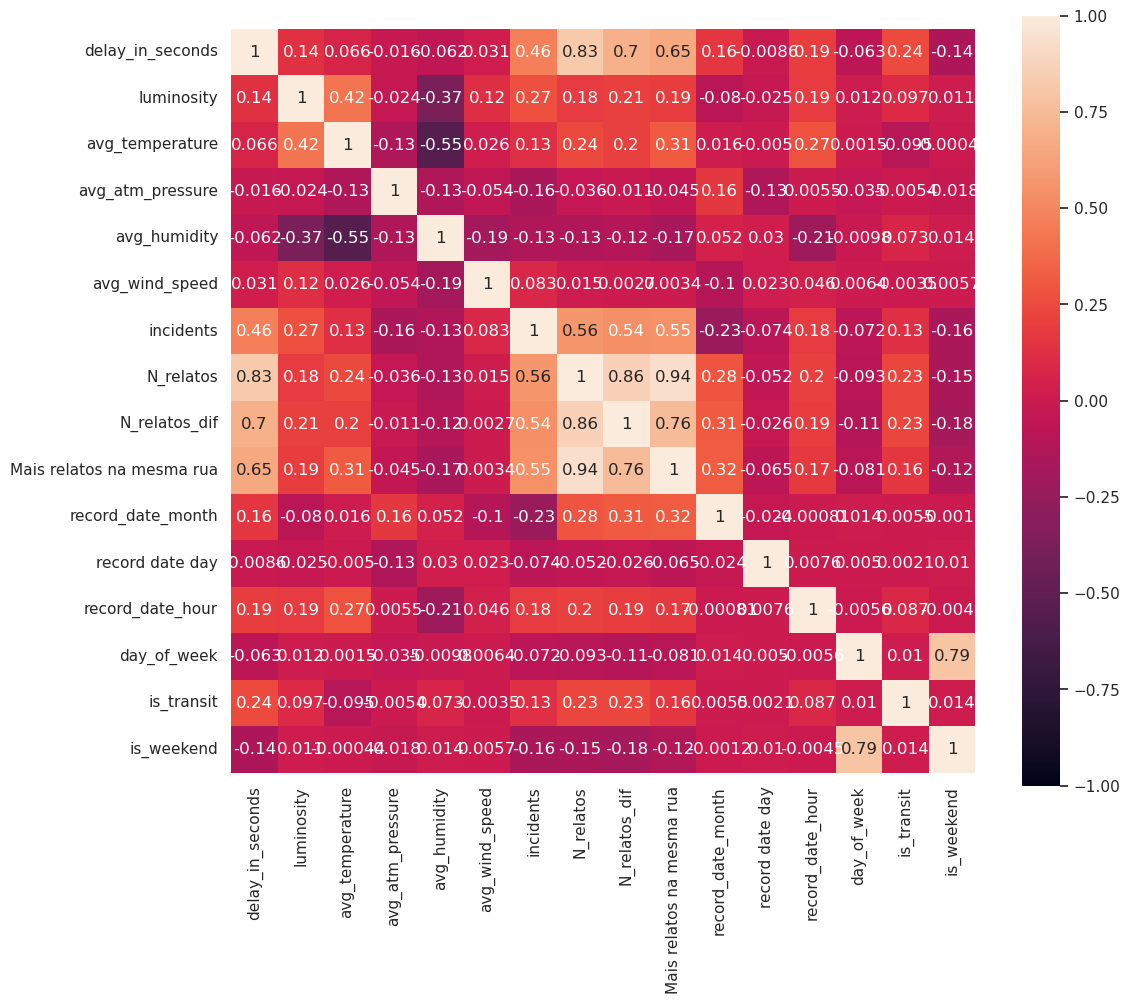

In [ ]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

# Exploratory Data Analysis

Time to put your data viz skills to the test! Try to recreate the following plots, make sure to import the libraries you'll need!

# Train Test Split

** Split your data into a training set and a testing set.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = data['incidents']    
x = data.loc[:, data.columns != "incidents"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=53)


# Train a Model

Now its time to train a Support Vector Machine Classifier. 

**Call the SVC() model from sklearn and fit the model to the training data.**

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Model Evaluation - SVM and DT

**Now get predictions from the model and create a confusion matrix and a classification report.**

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix

## Gridsearch Practice

In [ ]:
# fit the tree
full_tree = DecisionTreeClassifier(random_state=53)
full_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=53)

In [ ]:
print(classification_report(y_test, full_tree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       607
           1       0.82      0.84      0.83       213
           2       0.82      0.81      0.82       172
           3       0.87      0.87      0.87       352
           4       0.83      0.87      0.85       156

    accuracy                           0.90      1500
   macro avg       0.86      0.87      0.87      1500
weighted avg       0.90      0.90      0.90      1500



In [ ]:
ccp_alphas = full_tree.cost_complexity_pruning_path(x, y)["ccp_alphas"]

param_grid_clf = {'criterion': ["gini","entropy","log_loss"], 'max_depth': [8,10,11,20]}

In [ ]:
grid_clf = GridSearchCV(full_tree,param_grid_clf,refit=True,verbose=3)
grid_clf.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......criterion=gini, max_depth=8;, score=0.880 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=8;, score=0.883 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=8;, score=0.894 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=8;, score=0.891 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=8;, score=0.903 total time=   0.0s
[CV 1/5] END ......criterion=gini, max_depth=10;, score=0.891 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=10;, score=0.900 total time=   0.0s
[CV 3/5] END ......criterion=gini, max_depth=10;, score=0.913 total time=   0.0s
[CV 4/5] END ......criterion=gini, max_depth=10;, score=0.910 total time=   0.0s
[CV 5/5] END ......criterion=gini, max_depth=10;, score=0.913 total time=   0.0s
[CV 1/5] END ......criterion=gini, max_depth=11;, score=0.886 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=11;

/home/private/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/private/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/private/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/home/private/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'


GridSearchCV(estimator=DecisionTreeClassifier(random_state=53),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [8, 10, 11, 20]},
             verbose=3)

In [ ]:
grid_clf.best_params_

{'criterion': 'entropy', 'max_depth': 20}

In [ ]:
print(classification_report(y_test, grid_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       607
           1       0.87      0.88      0.88       213
           2       0.84      0.83      0.83       172
           3       0.93      0.91      0.92       352
           4       0.88      0.92      0.90       156

    accuracy                           0.93      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.93      0.93      0.93      1500



In [ ]:
ccp_alphas = full_tree.cost_complexity_pruning_path(x_train, y_train)["ccp_alphas"]

In [ ]:
ccp_alphas

array([0.        , 0.00018559, 0.00018695, 0.00018713, 0.0002381 ,
       0.00025   , 0.00025397, 0.00025714, 0.0002619 , 0.00026517,
       0.00026667, 0.00026667, 0.00027068, 0.00027096, 0.00027168,
       0.00027289, 0.00027619, 0.00027845, 0.00027875, 0.00027988,
       0.0002821 , 0.00028231, 0.00028267, 0.00028398, 0.00028457,
       0.00028482, 0.00028571, 0.00028571, 0.00028571, 0.00028571,
       0.00028571, 0.00028571, 0.00028571, 0.00028571, 0.00034014,
       0.00036281, 0.00036459, 0.00038095, 0.00038095, 0.00038095,
       0.00038095, 0.00038095, 0.00038095, 0.00038095, 0.00038095,
       0.00038095, 0.00038095, 0.00038095, 0.0004    , 0.0004    ,
       0.00041039, 0.00042857, 0.00042857, 0.00042857, 0.00042857,
       0.00042857, 0.00043537, 0.00043694, 0.00044898, 0.00045276,
       0.00045714, 0.00045714, 0.00045714, 0.00046429, 0.00046667,
       0.00047619, 0.00047619, 0.00047933, 0.00049524, 0.0005    ,
       0.0005    , 0.0005042 , 0.00050463, 0.00050473, 0.00050

In [ ]:
ccp_alpha_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=53),
    scoring=make_scorer(accuracy_score),
    param_grid = ParameterGrid({"ccp_alpha": [[alpha] for alpha in ccp_alphas]}),
)

In [ ]:
ccp_alpha_grid_search.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=53),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7eff0e5ed220>,
             scoring=make_scorer(accuracy_score))

In [ ]:
ccp_alpha_grid_search.best_params_

{'ccp_alpha': 0.0007428571428571429}

In [ ]:
best_ccp_alpha_tree = ccp_alpha_grid_search.best_estimator_

In [ ]:
print(classification_report(y_test, best_ccp_alpha_tree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       607
           1       0.85      0.85      0.85       213
           2       0.83      0.81      0.82       172
           3       0.88      0.89      0.88       352
           4       0.86      0.88      0.87       156

    accuracy                           0.90      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.90      0.90      0.90      1500



In [ ]:
full_tree = DecisionTreeClassifier(random_state=53, ccp_alpha= 0.0007428571428571429, max_depth=11, criterion='entropy')
full_tree.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0007428571428571429, criterion='entropy',
                       max_depth=11, random_state=53)

In [ ]:
kaggle_pred = full_tree.predict(test)

In [ ]:
df = pd.DataFrame({"incidents":kaggle_pred})

def update(x):
    if x == 0:
        return "None"
    elif x == 1:
        return "Low"
    elif x == 2:
        return "Medium"
    elif x == 3:
        return "High"
    else:
        return "Very High"

df['incidents'] = df['incidents'].apply(update)
df.index = np.arange(1, len(df) + 1)

df.to_csv('test_decision_tree.csv',index_label="RowId")

random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=53)
rf.fit(x_train, y_train)

print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       607
           1       0.85      0.90      0.87       213
           2       0.95      0.77      0.85       172
           3       0.90      0.91      0.91       352
           4       0.84      0.90      0.87       156

    accuracy                           0.92      1500
   macro avg       0.90      0.89      0.90      1500
weighted avg       0.92      0.92      0.92      1500



In [ ]:
importances = rf.feature_importances_
columns = x_train.columns
i = 0

while i < len(columns):
    print(f" The Importance of {columns[i]} is {round(importances[i] * 100, 2)}%")
    i += 1

 The Importance of delay_in_seconds is 16.6%
 The Importance of luminosity is 1.23%
 The Importance of avg_temperature is 5.08%
 The Importance of avg_atm_pressure is 6.35%
 The Importance of avg_humidity is 5.32%
 The Importance of avg_wind_speed is 2.42%
 The Importance of N_relatos is 9.43%
 The Importance of N_relatos_dif is 4.66%
 The Importance of Mais relatos na mesma rua is 7.54%
 The Importance of record_date_month is 22.52%
 The Importance of record date day is 10.03%
 The Importance of record_date_hour is 3.78%
 The Importance of day_of_week is 3.35%
 The Importance of is_transit is 0.75%
 The Importance of is_weekend is 0.93%


In [ ]:
grid_predictions6 = rf.predict(test)
grid_predictions6

array([4, 0, 0, ..., 3, 1, 3])

In [ ]:
grid_predictions6

df = pd.DataFrame({"incidents":grid_predictions6})

def update(x):
    if x == 0:
        return "None"
    elif x == 1:
        return "Low"
    elif x == 2:
        return "Medium"
    elif x == 3:
        return "High"
    else:
        return "Very High"

df['incidents'] = df['incidents'].apply(update)
df.index = np.arange(1, len(df) + 1)

df.to_csv('test_random_forest.csv',index_label="RowId")